# **Africa Insurance - Feature Engineering**
Importing of cleaned `insurance_africa_cleaned.csv` file for feature engineering purposes from own Google Drive location

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files

insurance_africa = pd.read_csv('/content/drive/MyDrive/insurance_africa_cleaned.csv')

In [122]:
insurance_africa.head().T

,0,1,2,3,4
months_as_customer,328,228,134,256,228
age,48.0,42.0,29.0,41.0,44.0
policy_number,521585,342868,687698,227811,367455
policy_bind_date,2014-10-17,2006-06-27,2000-09-06,1990-05-25,2014-06-06
policy_state,OH,IN,OH,IL,IL
policy_csl,250/500,250/500,100/300,250/500,500/1000
policy_deductable,1000.0,2000.0,2000.0,2000.0,1000.0
policy_annual_premium,1406.91,1197.22,1413.14,1415.74,1583.91
umbrella_limit,0,5000000,5000000,6000000,6000000
insured_zip,466132,468176,430632,608117,610706


Checking that there are no `NAN / null` values

In [123]:
insurance_africa.isna().sum()[insurance_africa.isna().sum() > 0]

Series([], dtype: int64)

In [124]:
insurance_africa.shape

(1000, 39)

## Bining Numeric Data

Age of customer bining

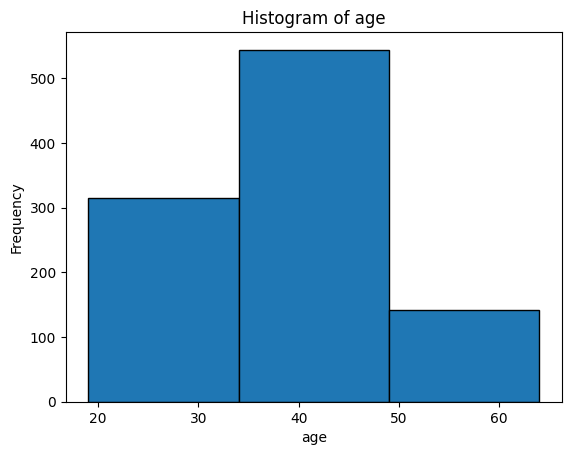

In [125]:
# Choose the column for the histogram
column_name = 'age'

# Plot the histogram
plt.hist(insurance_africa[column_name], bins=3, edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_name}')

# Display the histogram
plt.show()

In [126]:
bin_edges = [0, 30, 55, 100]  # Define the bin edges
bin_labels = ['Young Adult', 'Middle Aged', 'Elderly']  # Corresponding labels for each bin

# Create a new column based on the bin labels
insurance_africa['ages_category'] = pd.cut(insurance_africa['age'], bins=bin_edges, labels=bin_labels)

Months as customer bining

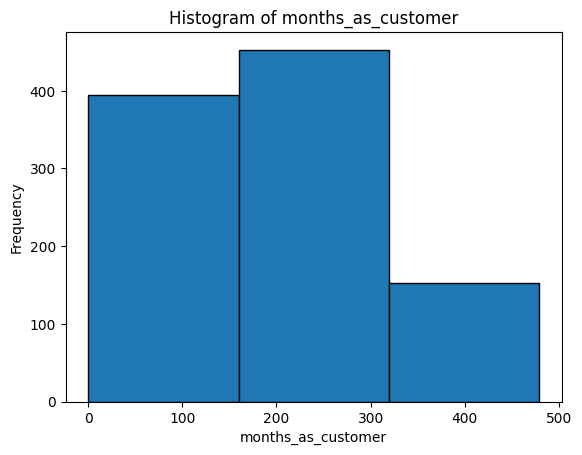

In [127]:
# Choose the column for the histogram
column_name = 'months_as_customer'

# Plot the histogram
plt.hist(insurance_africa[column_name], bins=3, edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_name}')

# Display the histogram
plt.show()

In [128]:
bin_edges_customer = [-1, 25, 150, 500]  # Define the bin edges
bin_labels_customer = ['New Client', 'Established Client', 'Long-Term Client']  # Corresponding labels for each bin

# Create a new column based on the bin labels
insurance_africa['customer_category'] = pd.cut(insurance_africa['months_as_customer'], bins=bin_edges_customer, labels=bin_labels_customer)

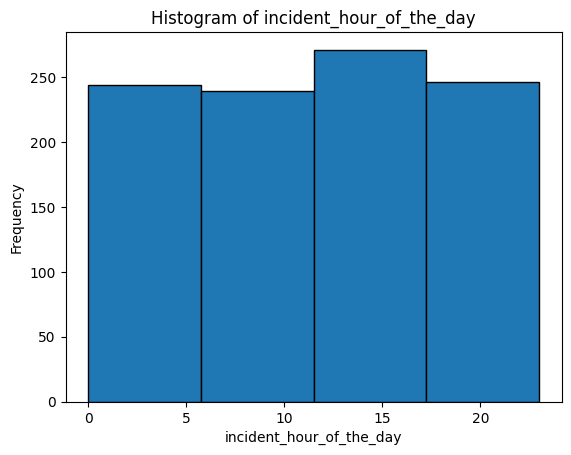

In [129]:
# Choose the column for the histogram
column_name = 'incident_hour_of_the_day'

# Plot the histogram
plt.hist(insurance_africa[column_name], bins=4, edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_name}')

# Display the histogram
plt.show()

In [130]:
bin_edges_time = [-1, 6, 12, 18, 24]  # Define the bin edges
bin_labels_time = ['Early morning', 'Morning', 'Afternoon', 'Evening']  # Corresponding labels for each bin

# Create a new column based on the bin labels
insurance_africa['time_of_day'] = pd.cut(insurance_africa['incident_hour_of_the_day'], bins=bin_edges_time, labels=bin_labels_time)

## Creating New Features

Converting `months_as_customer` to years

In [131]:
insurance_africa['years_as_customer'] = (insurance_africa['months_as_customer'] // 12).astype(int)

View of all features including newly created ones

In [132]:
insurance_africa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   months_as_customer           1000 non-null   int64   
 1   age                          1000 non-null   float64 
 2   policy_number                1000 non-null   int64   
 3   policy_bind_date             1000 non-null   object  
 4   policy_state                 1000 non-null   object  
 5   policy_csl                   1000 non-null   object  
 6   policy_deductable            1000 non-null   float64 
 7   policy_annual_premium        1000 non-null   float64 
 8   umbrella_limit               1000 non-null   int64   
 9   insured_zip                  1000 non-null   int64   
 10  insured_sex                  1000 non-null   object  
 11  insured_education_level      1000 non-null   object  
 12  insured_occupation           1000 non-null   object  
 13  insu

In [133]:
insurance_africa.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,time_of_day,years_as_customer
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,13020.0,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client,Early morning,27
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,780.0,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,Morning,19
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,3850.0,23100,Dodge,RAM,2007,N,Young Adult,Established Client,Morning,11
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,6340.0,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client,Early morning,21
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,650.0,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client,Evening,19


## Feature engineered upload

Exporting of feature engineered `insurance_africa` dataframe to my Google Drive location

In [134]:
insurance_africa.to_csv('/content/drive/MyDrive/insurance_africa.csv', index=False)
insurance_africa.to_excel('/content/drive/MyDrive/insurance_africa.xlsx', index=False)